Team members: Adithi, Adithiyaa, Alaric, Apoorva, Prabhas

---

## **Gender classification from voice analysis**

AIM: To identify genders based on pitch and MFCC's

<a id='contents'></a>

| Sl.no | Section                  |
|-------|--------------------------|
| 1.    |Data Collection           |
| 2.    | [Visualization](#section2)          |
| 3.    | [Data preprocessing](#section3)     |
| 4.    | [References](#section4)    |
| 5.    | [Model implementation](#section5)   |
| 6.    | [Model comparison](#section6)    |
| 7.    | [Conclusion](#section7)     |


---

### 1. Data collection
```
We initially had 17 audios of the preamble of the constitution collected from our IML class.
Added 34 more voice samples from various sources - friends, relatives, online peers, and classmates.
Features of the voice samples:
- Number of samples: 51 (20 female, 31 male)
- Duration: Approx 1 minute to 1 min 45 seconds
- Format: .wav
- Naming convention: fe1 , fe2,.. (females) . male1, male2, ...  (males)

```

<a id='section2'></a>

### 2. Visualization
1. Raw audio form
2. Spectogram
3. melspectogram
4. Pitch comparison
5. Intensity comparison

1. Raw audio

In [ ]:
import os
import random
import librosa
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
folder_path = "Data/Trimmed audios/All/"

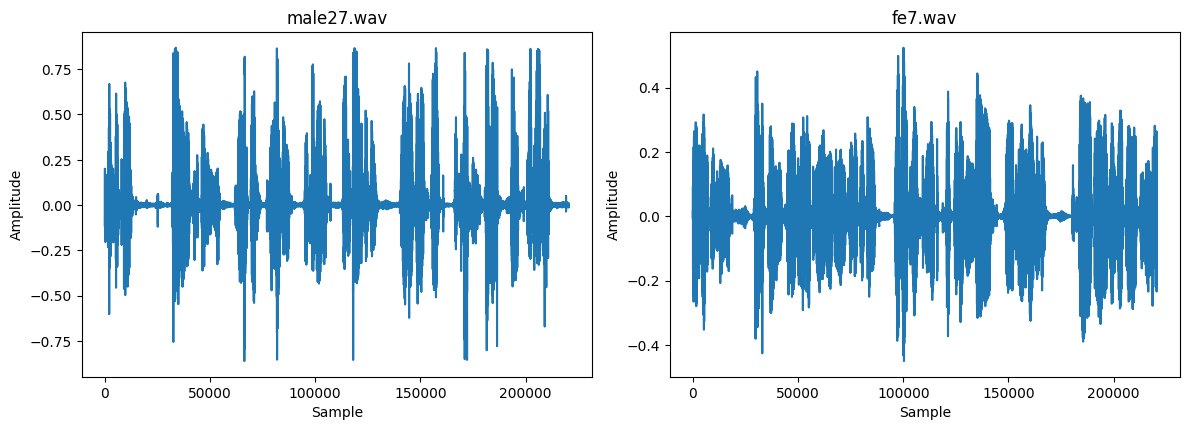

In [ ]:
male_files = []
female_files = []

for file_name in os.listdir(folder_path):
    if file_name.startswith("male"):
        male_files.append(os.path.join(folder_path, file_name))
    elif file_name.startswith("fe"):
        female_files.append(os.path.join(folder_path, file_name))

selected_files = random.sample(male_files, 1) + random.sample(female_files, 1)

plt.figure(figsize=(12, 8))
for i, file_path in enumerate(selected_files, 1):
    plt.subplot(2, 2, i)
    waveform, sample_rate = librosa.load(file_path)
    plt.plot(waveform)
    plt.title(os.path.basename(file_path))
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

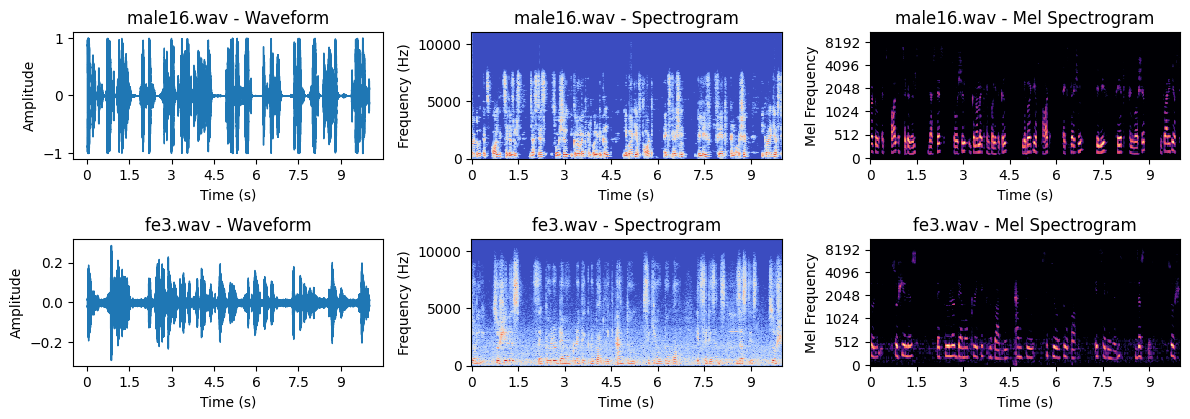

In [ ]:
selected_files = random.sample(male_files, 1) + random.sample(female_files, 1)

# Visualize the selected audio files
plt.figure(figsize=(12, 8))
for i, file_path in enumerate(selected_files, 1):
    plt.subplot(4, 3, 3*i-2)
    waveform, sample_rate = librosa.load(file_path)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title(os.path.basename(file_path) + ' - Waveform')
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.subplot(4, 3, 3*i-1)
    spec = librosa.stft(waveform)
    spec_db = librosa.amplitude_to_db(abs(spec))
    librosa.display.specshow(spec_db, sr=sample_rate, x_axis='time', y_axis='hz')
    plt.title(os.path.basename(file_path) + ' - Spectrogram')
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")

    plt.subplot(4, 3, 3*i)
    mel_spec = librosa.feature.melspectrogram(y=waveform, sr=sample_rate)
    mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
    librosa.display.specshow(mel_spec_db, sr=sample_rate, x_axis='time', y_axis='mel')
    plt.title(os.path.basename(file_path) + ' - Mel Spectrogram')
    plt.xlabel("Time (s)")
    plt.ylabel("Mel Frequency")

plt.tight_layout()
plt.show()

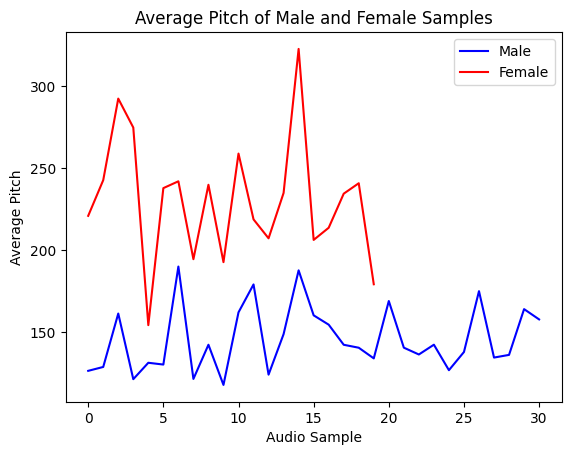

In [ ]:
import parselmouth

# Function to calculate pitch from audio file
def calculate_pitch(audio_file):
    snd = parselmouth.Sound(audio_file)
    pitch = snd.to_pitch()
    pitch_values = pitch.selected_array['frequency']
    # Exclude unvoiced segments (pitch == 0)
    pitch_values = pitch_values[pitch_values > 0]
    return np.mean(pitch_values)

male_pitches = []
female_pitches = []

# Iterate through audio files
for file in os.listdir(folder_path):
    if file.startswith("male"):
        male_pitches.append(calculate_pitch(os.path.join(folder_path, file)))
    elif file.startswith("fe"):
        female_pitches.append(calculate_pitch(os.path.join(folder_path, file)))

# Plotting
plt.plot(range(len(male_pitches)), male_pitches, color='blue', label='Male')
plt.plot(range(len(female_pitches)), female_pitches, color='red', label='Female')
plt.xlabel('Audio Sample')
plt.ylabel('Average Pitch')
plt.title('Average Pitch of Male and Female Samples')
plt.legend()
plt.show()

Plotting intensity of male v/s female

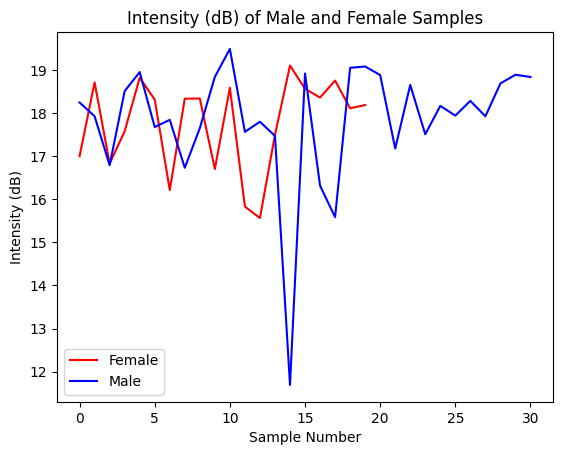

In [ ]:
def calculate_intensity(audio_file):
    snd = parselmouth.Sound(audio_file)
    intensity = snd.to_intensity()
    intensity_values = intensity.values.T[0]  # Extract intensity values
    intensity_dB = 10 * np.log10(intensity_values)  # Convert intensity to dB

    # Replace negative or NaN values with 0
    intensity_dB[intensity_dB < 0] = 0
    intensity_dB[np.isnan(intensity_dB)] = 0

    return intensity_dB.flatten()  # Flatten the intensity array

male_intensity = []
female_intensity = []

# Iterate through audio files
for file in os.listdir(folder_path):
    if file.startswith("male"):
        male_intensity.append(calculate_intensity(os.path.join(folder_path, file)))
    elif file.startswith("fe"):
        female_intensity.append(calculate_intensity(os.path.join(folder_path, file)))

x =len(male_intensity)
y=len(female_intensity)
new_male_intensity = []
new_female_intensity=[]

for i in range(x):
    new_male_intensity.append(male_intensity[i][0])

for i in range(y):
    new_female_intensity.append(female_intensity[i][0])

plt.plot(new_female_intensity, color='red', label='Female')

plt.plot(new_male_intensity, color='blue', label='Male')

plt.xlabel('Sample Number')
plt.ylabel('Intensity (dB)')
plt.title('Intensity (dB) of Male and Female Samples')

plt.legend()

plt.show()

<a id='section3'></a>

### 3. Data preprocessing

The audio duration was cut to 10 seconds and used for training the models.

Using librosa we extracted features for pitch using chroma_cens and MFCC's .

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import random

import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio

import soundfile as sf
import os
import warnings
from glob import glob
from google.colab import drive

In [ ]:
warnings.filterwarnings("ignore")

drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/My Drive/Year 2/Semester 4/a4p/Data/')

Audio Trimming

In [ ]:
def trim_audio(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)

    for file_name in os.listdir(input_folder):
        input_file_path = os.path.join(input_folder, file_name)
        y, sr = librosa.load(input_file_path)

        # Extract audio clip between 10-20 seconds
        start_time = 10
        end_time = 20
        start_sample = int(start_time * sr)
        end_sample = int(end_time * sr)

        trimmed_audio = y[start_sample:end_sample]

        output_file_path = os.path.join(output_folder, file_name)
        sf.write(output_file_path, trimmed_audio, sr)

# Trim female audios
# trim_audio("Audios/female/", "Audios/trim_audios/female/")

# Trim male audios
# trim_audio("Audios/Male/", "Audios/trim_audios/male/")

Sample audio @ random

In [ ]:
folder_path = "Data/Trimmed audios/All/"
wav_files = [file for file in os.listdir(folder_path) if file.endswith(".wav")]

random_wav_file = random.choice(wav_files)
audio_file = os.path.join(folder_path, random_wav_file)

Audio(audio_file)

Extracting MFCC data from the audio files

In [ ]:
folder_path = "Data/Trimmed audios/All/"

mfcc_df = pd.DataFrame()

for filename in os.listdir(folder_path):
    if filename.endswith('.wav'):
        audio_file = os.path.join(folder_path, filename)
        gender = 'F' if 'fe' in filename else 'M'
        y, sr = librosa.load(audio_file)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfccs_mean = pd.DataFrame(mfccs.T).mean().to_frame().T
        mfccs_mean['Gender'] = gender
        mfcc_df = pd.concat([mfcc_df, mfccs_mean], ignore_index=True)

print(mfcc_df.head(2))
# mfcc_df.to_csv("../Data/audio mfcc data.csv", index=False)

Extracting Chroma CENS data from the audio files

In [ ]:
folder_path = "Data/Trimmed audios/All/"

rows = []

for filename in os.listdir(folder_path):
    if filename.endswith('.wav'):
        audio_file = os.path.join(folder_path, filename)
        y, sr = librosa.load(audio_file)
        chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
        chroma_cens_mean = np.mean(chroma_cens, axis=1)
        gender = 'F' if 'fe' in filename else 'M'
        chroma_cens_mean_with_gender = np.append(chroma_cens_mean, gender)
        rows.append(chroma_cens_mean_with_gender)

columns = [f'Chroma_CENS_{i}' for i in range(chroma_cens_mean.size)] + ['Gender']

chroma_df = pd.DataFrame(rows, columns=columns)

print(chroma_df.head(2))
# chroma_df.to_csv("../Data/audio chroma_cens data", index=False)

---

### 4. References

#### MFCC explanation

MFCC Explanation
MFCC stands for Mel Frequency Cepstral Coefficients. MFCC is used to extract information from audio signals that can be used to understand the signals and its nature. It shows a concise view of the signals in the form of a spectrum.
MFCC values show the rate at which signals change within a certain spectrum band. A spectrum band is a range of frequencies.
Positive values indicate low frequency regions while negative values indicate higher frequency regions. A mean of these values for an audio sample is used to classify audio samples.
To extract MFCCs there are 6 steps to follow:
1.	Convert the audio sample into shorter time frames – an audio file will contain a large range of frequencies. A major part of calculating MFCC values is to perform Fourier Transform. Fourier transform is used to break down an audio signal to understand how it has been created. Fourier transform utilizes frequencies to extract the base of a signal, but since a signal comprises of multiple frequency ranges, we break it down into smaller time frames. A standard time frame can have a duration ranging from 20 to 40 milliseconds.
2.	Windowing – two consecutive time frames will transition from one frequency range to another. This can cause overlaps and thereby spectral leakage. Spectral leakage refers to the mismatch between the original signal and the derived frequency range obtained from Fourier Transform. Windowing is used to prevent such overlaps and reduce spectral leakage.
3.	Calculating Discrete Fourier Transform – using the time frames, we can perform Discrete Fourier Transform, which is the mathematical operation used to perform Fourier Transform. Using this the frequency spectrum is calculated for each time frame. We also calculate a power spectrum or periodogram which is an array of values denoting the energy distribution of the signal across frequencies for a given time frame of the signal.
4.	Using filter banks – to calculate MFCC values we use a Mel spaced Filter Bank. Its essentially a graph consisting of triangular filters that span across spectrum bands. There is limited to no gap between filter banks to account for overlaps between the spectrum bands. A filter bank generally comes in the form of 20-40 vectors consisting of 257 coefficients. The 257 coefficients correspond to the number of frequency bins obtained after performing Fast Fourier Transform on the input audio signal. These coefficients are multiplied with the corresponding power spectrum values to obtain a set of values. These values are added up to get a value for each filter bank which represents the energy of the signal in each filter bank. This way we multiple MFCC coefficients for one time frame (12 – 20).
5.	Apply logarithm – log is applied to these values to get log filter bank energies for each time frame.
6.	Discrete Cosine Transform – this is an option step used to reduce the corelation between coefficients obtained for each time frame. The corelation can be due to overlapping frequencies.

#### Chroma cens explanation:

Chroma CENS (Chroma Energy Normalised Statistics) is mainly used to analyses components of music such as notes, scales, and chords. Chroma features mainly deal with the 12 notes of music or pitch classes. Irrespective of which octave the note is in, it will be categorised according to its note.
Steps to calculate Chroma CENS values:
1.	Fourier Transform – Fourier transform is performed on the time frames to retrieve the base values of the audio signal.
2.	Spectral Analysis – this is used to extract the power spectrum of the audio signal frames.
3.	Mapping to Chroma Bins – the frequency bins in this case are mapped with the 12 pitch classes irrespective of its octave (C2 and C3 will both be mapped to C).
4.	Normalization – to ensure the data is standardized across the pitch classes, the energy of the signal is not taken into consideration to reduce differentiations between the same pitch class being represented at different energies.
5.	Quantization – any sensitivities towards timbre or dynamics are also reduced. This helps ignore any variations that could occur in the same pitch class.
6.	Smoothing – this is an averaging technique where the vectors are averaged over time to reduce effects of dynamics and to gather a sustained harmonic input rather than varied components.
7.	Statistics – the final values contain mean, median and variance over a certain period of the audio content. This can then be used to identify notes and chords in the audio sample.

---

<a id='section5'></a>

### 5. Model implementation

##### 1. Logistic Regression

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
mfcc_data = pd.read_csv("Data/audio mfcc data.csv")

X_train, X_test, y_train, y_test = train_test_split(mfcc_data.drop('Gender', axis=1), mfcc_data['Gender'], test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9090909090909091


C:\Users\hrbhat\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
chroma_data = pd.read_csv("Data/audio chroma_cens data.csv")

X_train, X_test, y_train, y_test = train_test_split(chroma_data.drop('Gender', axis=1), chroma_data['Gender'], test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6363636363636364


##### 2. CNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

import keras
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [ ]:
folder_path = "Data/Trimmed audios/All/"

audio_files = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.wav'):
        file_path = os.path.join(folder_path, file_name)
        audio_files.append(file_path)

In [ ]:
def extract_mfcc_fixed_length(file_path, max_length=216):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    if mfccs.shape[1] < max_length:
        pad_width = max_length - mfccs.shape[1]
        mfccs = np.pad(mfccs, ((0, 0), (0, pad_width)), 'constant')
    elif mfccs.shape[1] > max_length:
        mfccs = mfccs[:, :max_length]
    return mfccs

In [ ]:
data = []
labels = []
for file in audio_files:
    mfccs = extract_mfcc_fixed_length(file)
    data.append(mfccs.T)
    labels.append('male' if 'male' in file else 'female')

data = np.array(data)
labels = np.array(labels)

le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

data = data.reshape(data.shape[0], data.shape[1], data.shape[2], 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels_categorical, test_size=0.2, random_state=42)

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(data.shape[1], data.shape[2], 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=1, epochs=15, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)



Epoch 1/15


40/40 [==============================] - 2s 17ms/step - loss: 33.6614 - accuracy: 0.4000 - val_loss: 2.8355 - val_accuracy: 0.5455
Epoch 2/15
40/40 [==============================] - 0s 11ms/step - loss: 0.5835 - accuracy: 0.7500 - val_loss: 0.6935 - val_accuracy: 0.7273
Epoch 3/15
40/40 [==============================] - 0s 12ms/step - loss: 0.4994 - accuracy: 0.8250 - val_loss: 0.9023 - val_accuracy: 0.5455
Epoch 4/15
40/40 [==============================] - 0s 11ms/step - loss: 0.4258 - accuracy: 0.8500 - val_loss: 0.8161 - val_accuracy: 0.6364
Epoch 5/15
40/40 [==============================] - 0s 11ms/step - loss: 0.2583 - accuracy: 0.9500 - val_loss: 1.4188 - val_accuracy: 0.6364
Epoch 6/15
40/40 [==============================] - 0s 10ms/step - loss: 0.3485 - accuracy: 0.9500 - val_loss: 4.9101 - val_accuracy: 0.7273
Epoch 7/15
40/40 [==============================] - 0s 10ms/step - loss: 3.4066 - accuracy: 0.8000 - val_loss: 1.1932 - val_accuracy: 0.6364
Epoch 8/

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

predictions = model.predict(X_test)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(true_classes, predicted_classes))

print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))

1/1 [==============================] - 0s 31ms/step - loss: 2.5691 - accuracy: 0.8182
Test Loss: 2.5690834522247314
Test Accuracy: 0.8181818127632141
1/1 [==============================] - 0s 118ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.83      0.83      0.83         6

    accuracy                           0.82        11
   macro avg       0.82      0.82      0.82        11
weighted avg       0.82      0.82      0.82        11

Confusion Matrix:
[[4 1]
 [1 5]]


---

##### 3. Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
mfcc_df = pd.read_csv("audio mfcc data.csv")

X = mfcc_df.iloc[:, :13]
y = mfcc_df.iloc[:, 13]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=100)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7272727272727273


In [ ]:
chroma_df = pd.read_csv("audio chroma_cens data.csv")

X = chroma_df.iloc[:,:12]
y = chroma_df.iloc[:,12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=10)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6363636363636364


##### 4. Decision Tree

In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import logging
import dtreeviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv('Data/audio chroma_cens data.csv')
X = df.drop(['Gender'],axis=1)
y = df['Gender']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y_encoded, test_size=0.20) #, random_state=1)

In [5]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X_train,Y_train)
report = classification_report(Y_validation, model.predict(X_validation))
print(report)

              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.57      0.80      0.67         5

    accuracy                           0.64        11
   macro avg       0.66      0.65      0.63        11
weighted avg       0.67      0.64      0.63        11



In [6]:
train_predictions = model.predict(X_train)

accuracy = accuracy_score(Y_train, train_predictions)
print("The accuracy of the model on the train data is:", accuracy)

The accuracy of the model on the train data is: 1.0


In [7]:
test = X_validation

train_predictions = model.predict(test)

accuracy = accuracy_score(Y_validation, train_predictions)
print("The accuracy of the model on the train data is:", accuracy)

The accuracy of the model on the train data is: 0.6363636363636364


In [8]:
data = pd.read_csv('Data/audio mfcc data.csv')
X_ = df.drop(['Gender'],axis=1)
y_ = df['Gender']

le = LabelEncoder()
y_encoded_ = le.fit_transform(y_)

X_train, X_validation, Y_train, Y_validation = train_test_split(X_, y_encoded_, test_size=0.20) #, random_state=1)

In [9]:
clf = DecisionTreeClassifier(random_state= 15)
model = clf.fit(X_train,Y_train)
report = classification_report(Y_validation, model.predict(X_validation))
print(report)

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.86      0.75      0.80         8

    accuracy                           0.73        11
   macro avg       0.68      0.71      0.69        11
weighted avg       0.76      0.73      0.74        11



In [10]:
train_predictions = model.predict(X_train)

accuracy = accuracy_score(Y_train, train_predictions)
print("The accuracy of the model on the train data is:", accuracy)

The accuracy of the model on the train data is: 1.0


In [11]:
test = X_validation

train_predictions = model.predict(test)

accuracy = accuracy_score(Y_validation, train_predictions)
print("The accuracy of the model on the test data is:", accuracy)

The accuracy of the model on the test data is: 0.7272727272727273


In [ ]:
# !pip install dtreeviz
# !pip install graphviz

In [12]:
logging.getLogger('matplotlib.font_manager').disabled = True

C:\Users\hrbhat\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


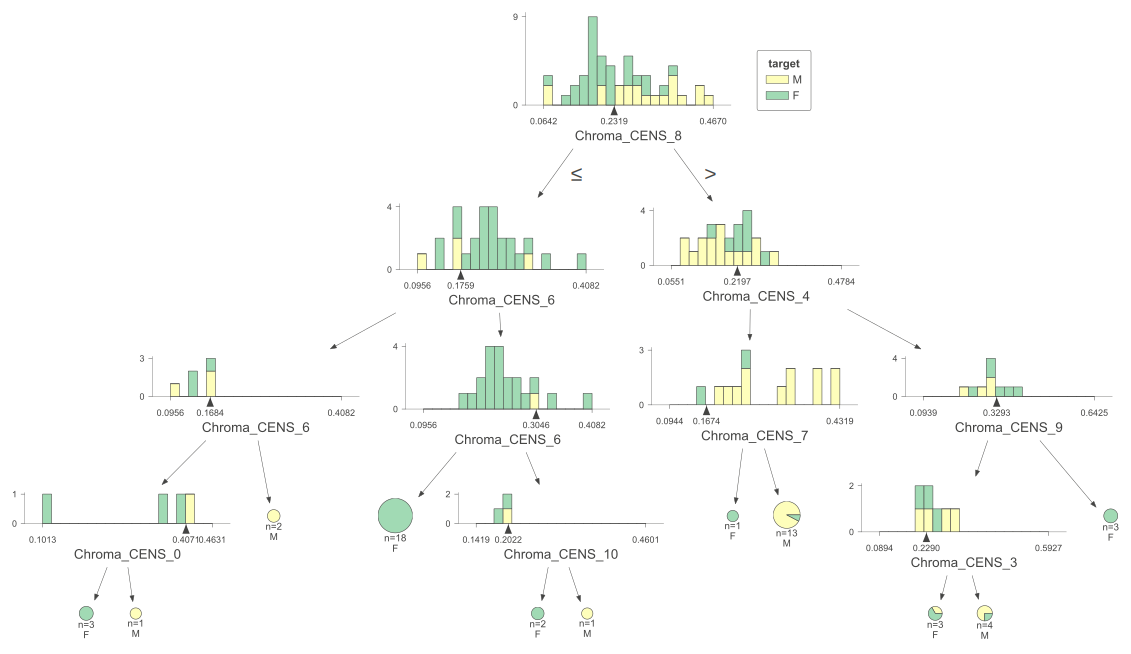

In [14]:
viz = dtreeviz.model(clf, X_, y_encoded_,
           target_name='target',
           feature_names=["Chroma_CENS_0","Chroma_CENS_1","Chroma_CENS_2","Chroma_CENS_3","Chroma_CENS_4","Chroma_CENS_5","Chroma_CENS_6","Chroma_CENS_7","Chroma_CENS_8","Chroma_CENS_9","Chroma_CENS_10",	"Chroma_CENS_11"],
           class_names=['M','F'])

viz.view(scale=1.5)

---

<a id='section6'></a>

### 6. Model comparison

|Model type|Model Accuracy for MFCC Data|Model Accuracy for Chroma_cens Data|
|-|-|-|
|Logistic regression|0.90|0.63|
|Decision Tree|0.73|0.64|
|CNN|0.82|---|
|Random forest|0.72|0.63|

The problem statement we chose is a binary classification problem.
- Logistic Regression was most ideal for the given data set.
- Decision Tree and Random Forest produced similar results while Convolutional Neural Network gave good results.  
- CNN is more suitable for image classification and object recognition. While it can be used for an audio classification model to, it is not as ideal. 
- Given the feature set and the classification nature of the data set, we assumed that decision tree and random forest would produce good results. 

---

<a id='section7'></a>

### 7. Conclusions

**Observations regarding Dataset Selection:**

1. We used two data sets to train the models, Mel-frequency Cepstral Coefficients (MFCC) and Chroma CENS (Chroma Energy Normalised Statistics). Both data sets contain extracted numeric data from the audio clips
We trained all 4 models with these two data sets and got better results with MFCCS.

2. MFCC is the more suitable feature set when trying to classify male and female voice. 
3. Chroma CENS is widely used for music-based classifiers where notes or chords need to be identified. Since Chroma CENS ignores **octaves** within which the notes are found, it does not work as efficiently to classify the voices.
4. MFCC extracts frequency-based information which is useful in classifying the audio samples and hence provided better results

```This helped us learn the importance of collecting the right data set for the model that needs to be designed. Some sets will be more ideal than others even if it has the potential of working. Understanding what is suitable or not is crucial for creating a good prediction model.```

**General observations**
- We compared various models and sets to better understand how to choose the right model and data set given a problem statement. 
- All models and both sets produce results, but they may not be the best solution that can be produced.
- While creating a model we should strive to achieve the best possible results without compromising on any factors to a large extent. 
- Each model has a purpose and area where it will work in a more effective manner. Similarly, data sets extracted from the same medium can be used in different areas to give better results.
- For our model, Logistic Regression model trained using MFCC data extracted from the audio samples produced the best results.

---

[Return to Contents table](#contents)